In [2]:
import sys
!{sys.executable} -m pip install pycbc ligo-common lalsuite --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.5 MB/s 
     |████████████████████████████████| 48.3 MB 1.3 MB/s 
     |████████████████████████████████| 78 kB 45.0 MB/s 
     |████████████████████████████████| 7.3 MB 56.3 MB/s 
     |████████████████████████████████| 1.4 MB 59.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 201 kB 61.8 MB/s 
     |████████████████████████████████| 51 kB 44.3 MB/s 
     |████████████████████████████████| 45 kB 49.6 MB/s 
     |████████████████████████████████| 45 kB 51.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 55 kB 51.4 MB/s 
     |████████████████████████████████| 295 kB 81.3 MB/s 
     |███████████

In [3]:
#Import the PSDS we want to plot
from pycbc.psd import aLIGOaLIGO140MpcT1800545
from pycbc.psd import aLIGOaLIGOO3LowT1800545
from pycbc.psd import aLIGOaLIGO175MpcT1800545
from pycbc.psd import EinsteinTelescopeP1600143

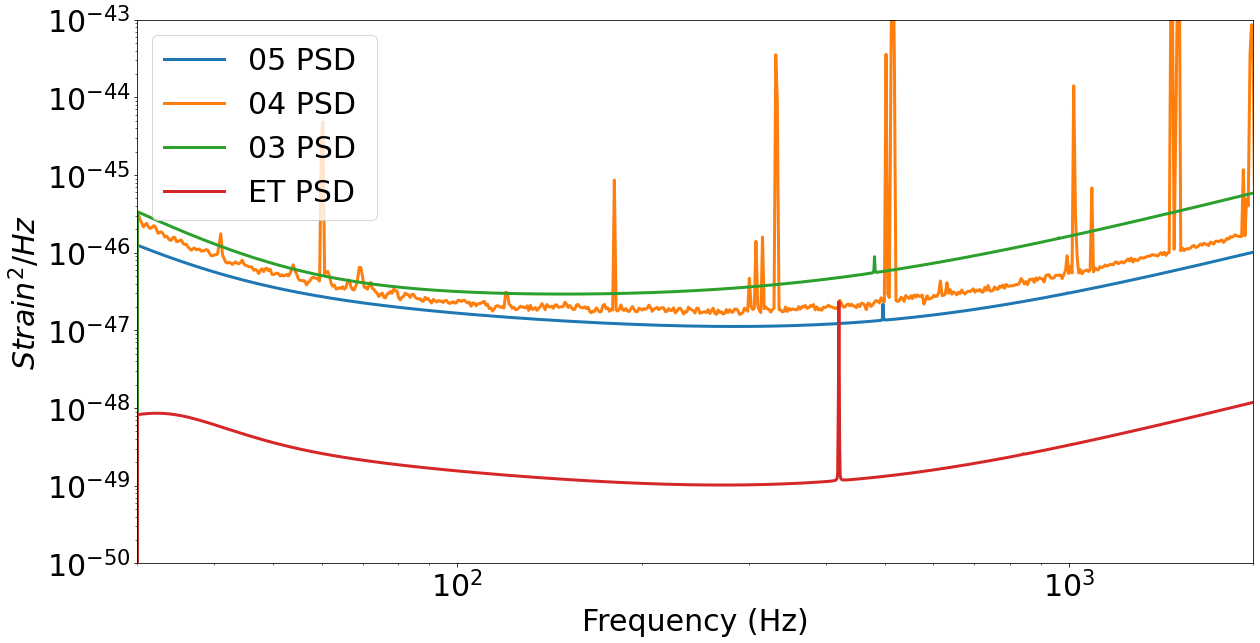

In [8]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
from matplotlib import pyplot as plt
import pylab

#Base of this code is found here https://pycbc.org/pycbc/latest/html/psd.html
# setup VV
flow = 30.0                             
delta_f = 1.0 / 16                      
flen = int(2048 / delta_f) + 1                                       

#define the psds to plot, each one is a fucntion call from pycbc.psd

psd = pycbc.psd.aLIGOaLIGO175MpcT1800545(flen, delta_f, flow)
psd1 = pycbc.psd.aLIGOaLIGO140MpcT1800545(flen, delta_f, flow)
psd2 = pycbc.psd.aLIGOaLIGOO3LowT1800545(flen, delta_f, flow) 
psd3 = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow) 

#produce the log strain plots vs frequency for each noise curve

pp.figure(figsize=[20, 10])
pp.loglog(psd.sample_frequencies, psd, linewidth=3, label='05 PSD')
pp.loglog(psd1.sample_frequencies, psd1, linewidth=3, label='04 PSD')
pp.loglog(psd2.sample_frequencies, psd2, linewidth=3, label= '03 PSD')
pp.loglog(psd3.sample_frequencies, psd3, linewidth=3, label='ET PSD ')
pp.xlim(xmin=flow, xmax=2000)                                            #set the minimum X value to be the lowest edge of the noise curve we prduced
plt.xticks(fontsize = 30)                                                #make font size bigger
pylab.ylabel('$Strain^2 / Hz$',fontsize = 30)                            #set labels
pylab.xlabel('Frequency (Hz)',fontsize = 30)
plt.yticks(fontsize = 30)                                                #make font size bigger
pp.ylim(1e-50, 1e-43)                                                    #set y limits
pp.legend(loc=2,prop={'size': 30})                                       #legend to indicate which line belongs to which PSD
pp.show()
 
#var=plt.gcf() # get fig                                                 #uncomment these lines to save the figure
#var.savefig('PSD.pdf', format='pdf') #save fig  